## EDA Practical on Heart Disease

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset

df = pd.read_csv(r'EDA Practical (16th, 17th Aug)\EDA- HEALTHCARE DOMAIN\heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Univariate Analysis

#### Analysis of `target` feature variable

In [11]:
df['target'].nunique()

2

In [12]:
df['target'].unique()

array([1, 0], dtype=int64)

In [13]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

#### Visualizing frequency distribution of 'target' variable

In [14]:
sns.set(style="whitegrid")

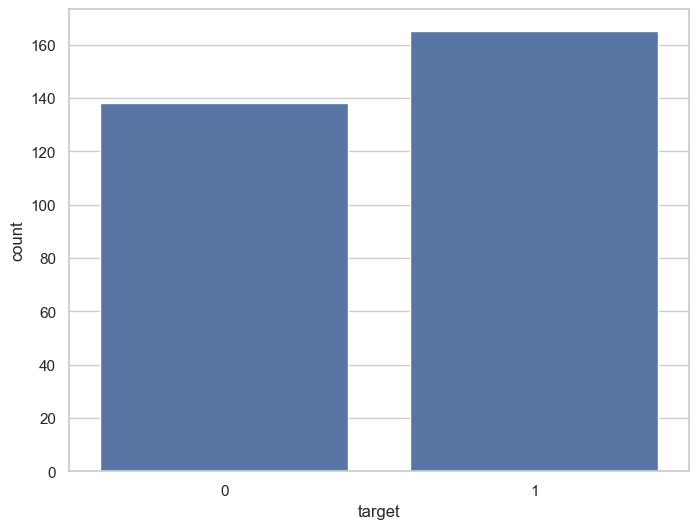

In [15]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(x = 'target', data=df)
plt.show()

#### Frequency distribution of 'target' variable with respect to 'sex'

groupby(): This groups the DataFrame df by the values in the 'sex' column. This means that all the data is divided into separate groups based on the different unique values in the 'sex' column (e.g., one group for "male" and one for "female").

In [16]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

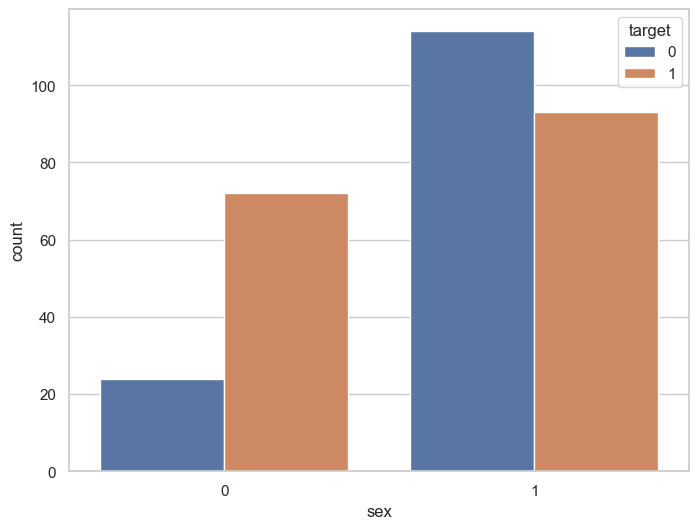

In [17]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(x = 'sex', hue='target', data=df)
plt.show()

Alternatively, we can visualize the same information as follows :

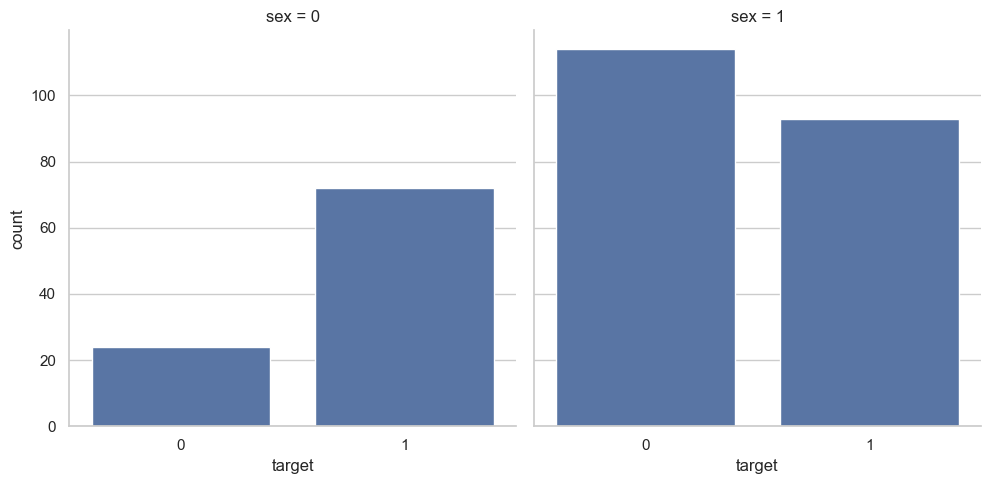

In [18]:
ax = sns.catplot(x = 'target', col = 'sex', data =df, kind = 'count', height=5, aspect=1)

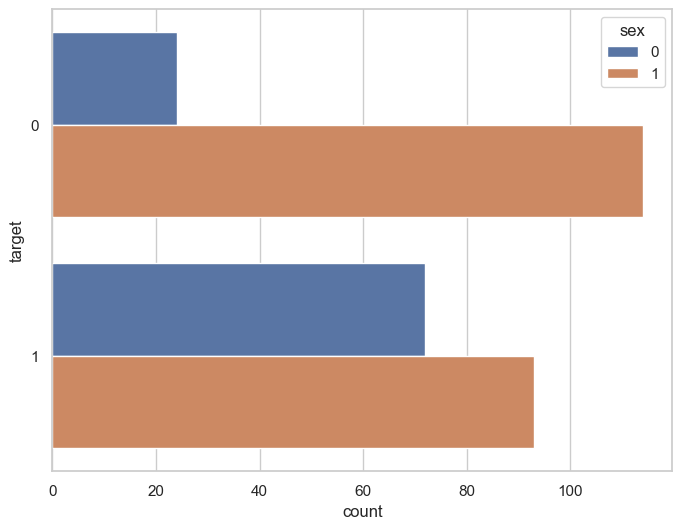

In [19]:
f, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(y = 'target', hue='sex', data=df)
plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_18956\757125829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'target', data=df, palette="Set1")


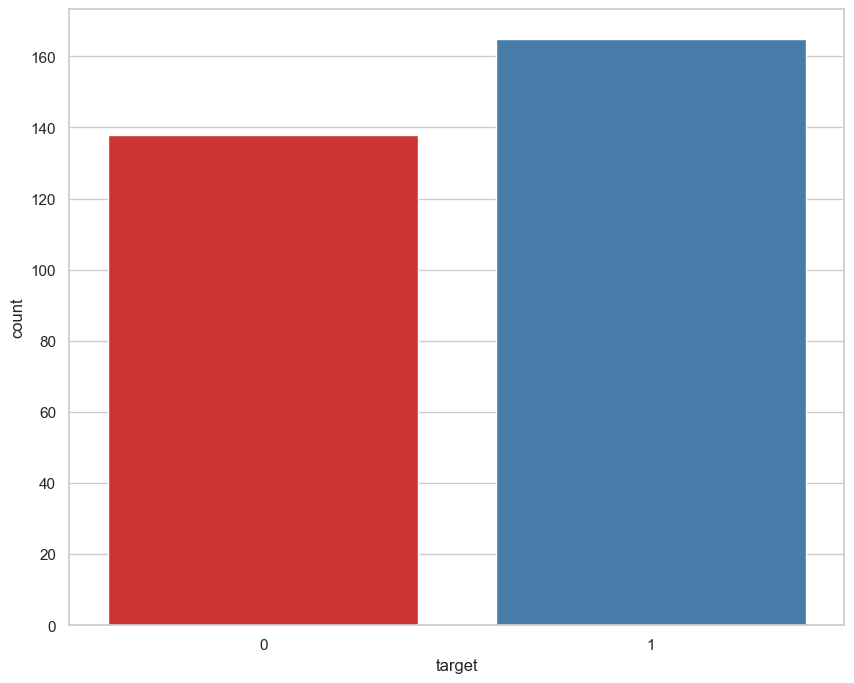

In [20]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = 'target', data=df, palette="Set1")
plt.show()

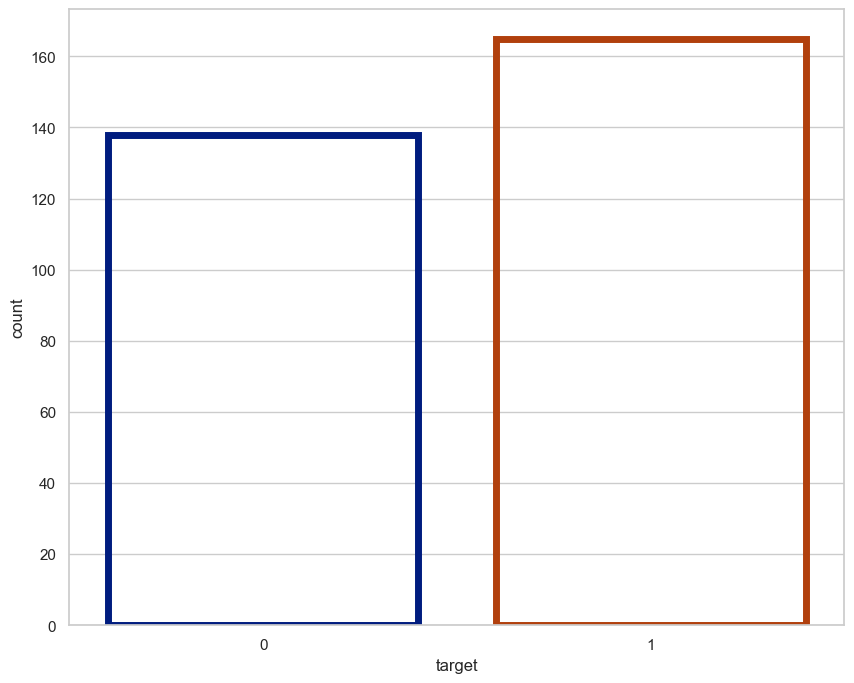

In [21]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = 'target', data=df, facecolor = (0, 0, 0, 0), linewidth = 5, edgecolor = sns.color_palette("dark", 3))
plt.show()

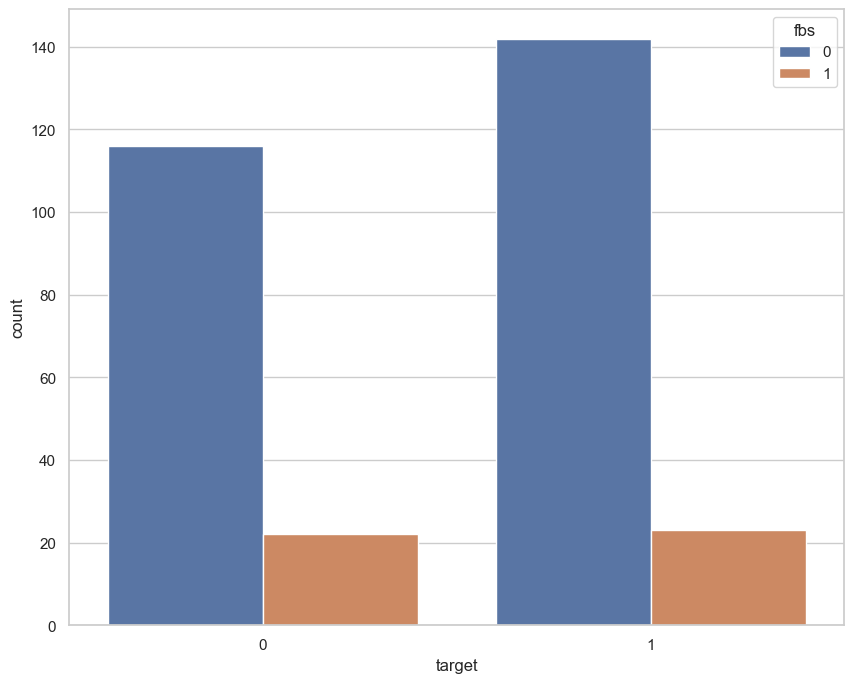

In [22]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = 'target', data=df, hue='fbs')
plt.show()

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

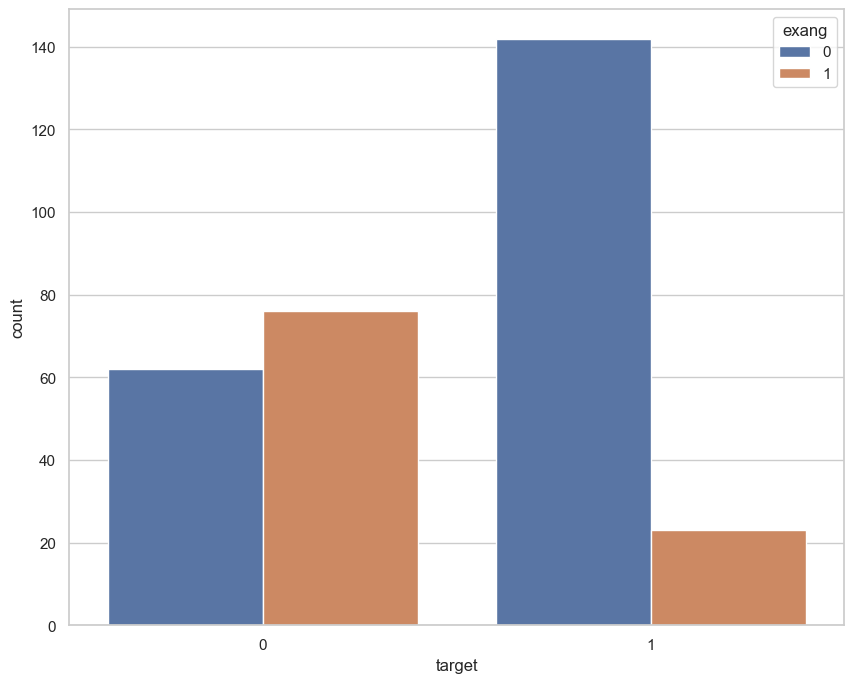

In [24]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = 'target', hue='exang', data=df)
plt.show()

## Bivariate Analysis

### Estimate correlation coefficients

In [25]:
correlation = df.corr()

In [26]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

#### Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with `target` variable.

- When it is close to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with `target` variable.

- When it is close to 0, it means that there is no correlation. So, there is no correlation between `target` and `fbs`.

- We can see that the `cp` and `thalach` variables are mildly positively correlated with `target` variable. So, I will analyze the interaction between these features and `target` variable.


## Analysis of `target` and `cp` variable

In [27]:
df['cp'].nunique()

4

In [28]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

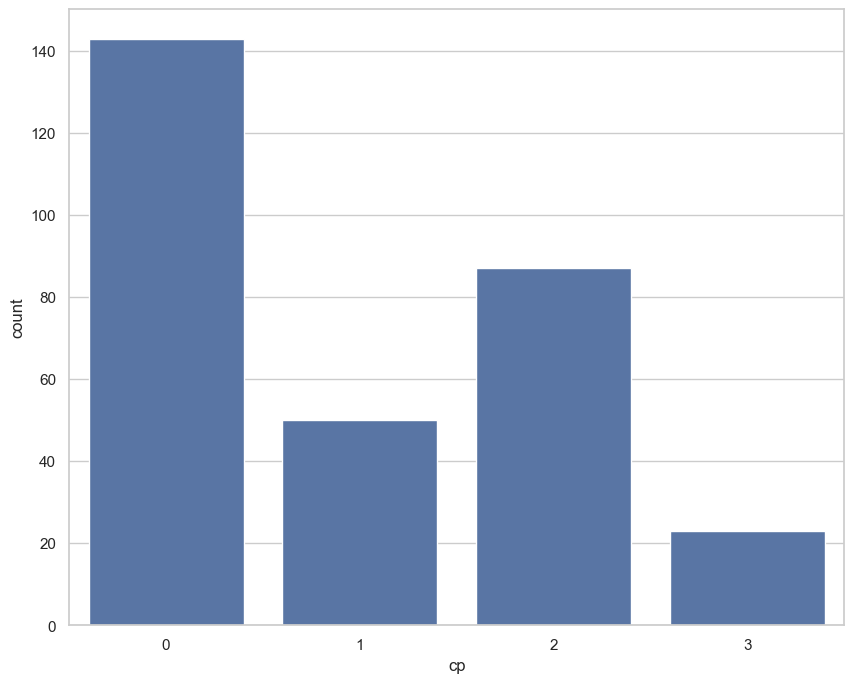

In [29]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = "cp", data=df)
plt.show()

#### Frequency distribution of `target` variable wrt `cp`

In [30]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

We can visualize the value counts of the `cp` variable wrt `target` as follows -

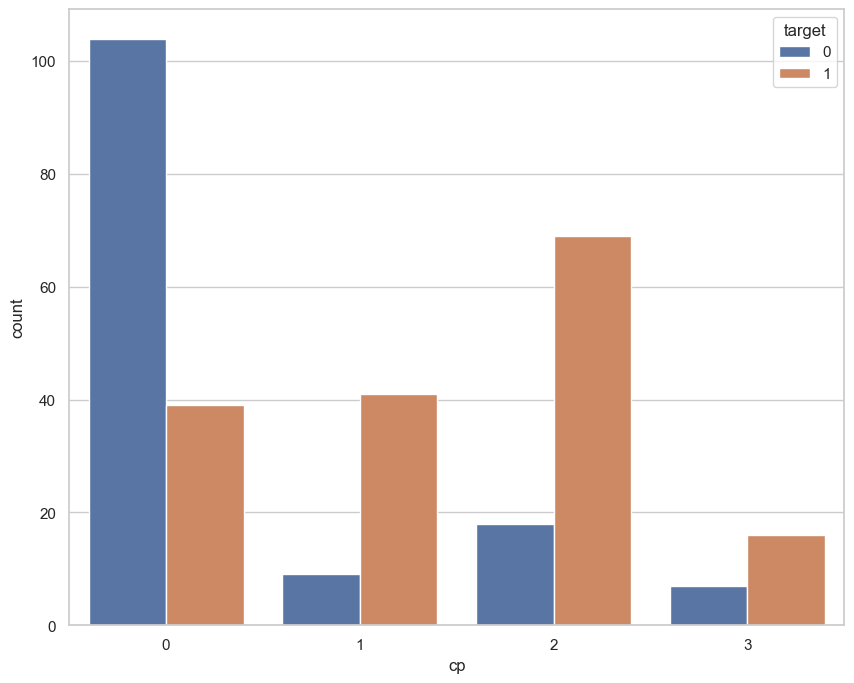

In [31]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = 'cp', data = df, hue = 'target')
plt.show()

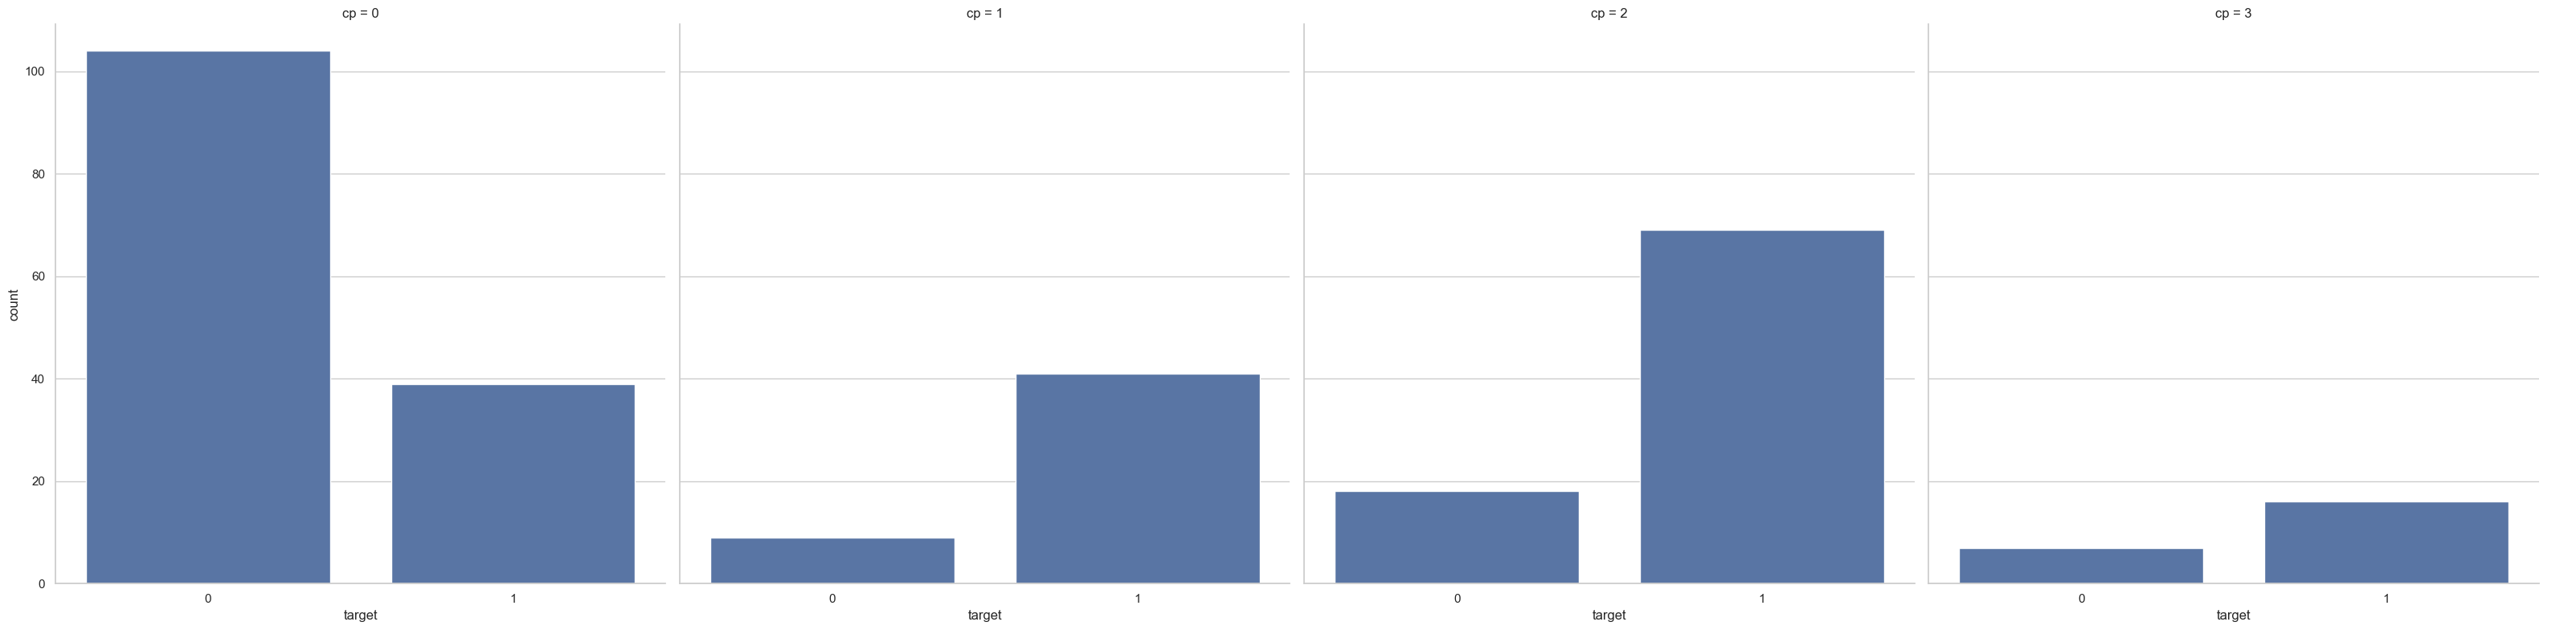

In [32]:
ax = sns.catplot(x = 'target', col = "cp", data = df, kind = 'count', height = 8, aspect = 1)

### Analysis of `target` and `thalach` variable

In [33]:
df['thalach'].nunique()

91

#### Visualize the frequency distribution of `thalach` variable

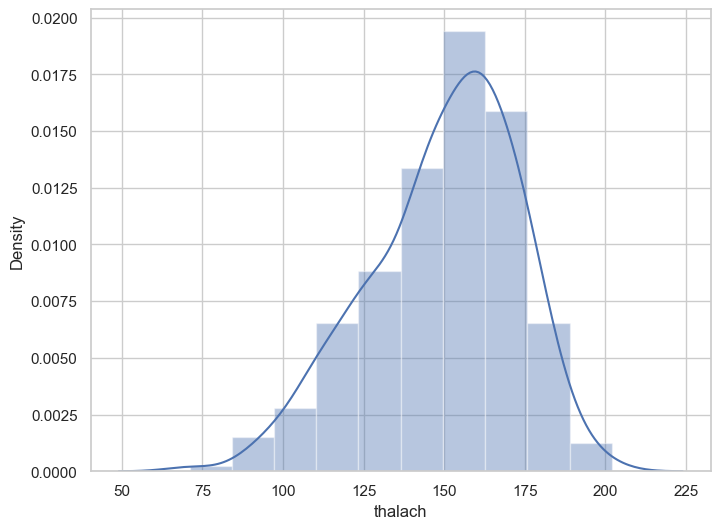

In [37]:
f, ax = plt.subplots(figsize = (8, 6))
x = df['thalach']
ax = sns.distplot(x, bins = 10)
plt.show()

We can use Pandas series object to get an informative axis label as follows :

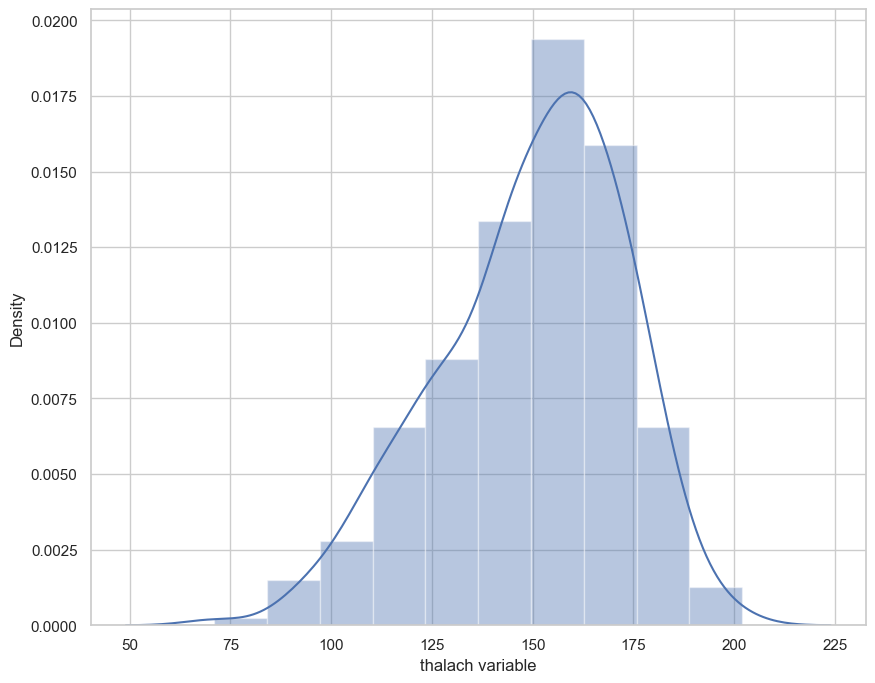

In [38]:
f, ax = plt.subplots(figsize = (10, 8))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

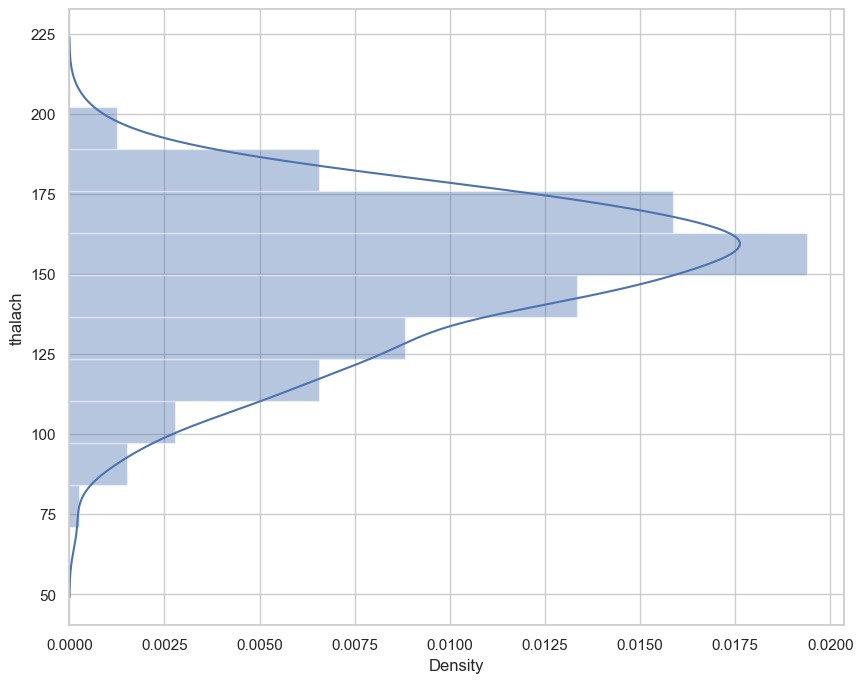

In [39]:
f, ax = plt.subplots(figsize = (10, 8))
x = df['thalach']
ax = sns.distplot(x, bins=10, vertical=True)
plt.show()

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

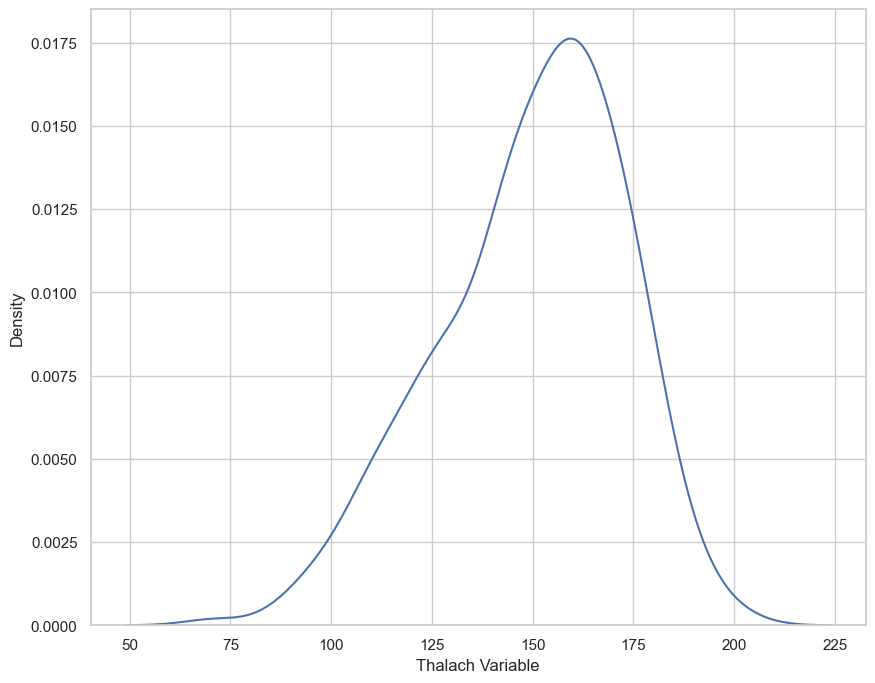

In [40]:
f, ax = plt.subplots(figsize = (10, 8))
x = df['thalach']
x = pd.Series(x, name="Thalach Variable")
ax = sns.kdeplot(x)
plt.show()

We can shade under the density curve and use a different color as follows:

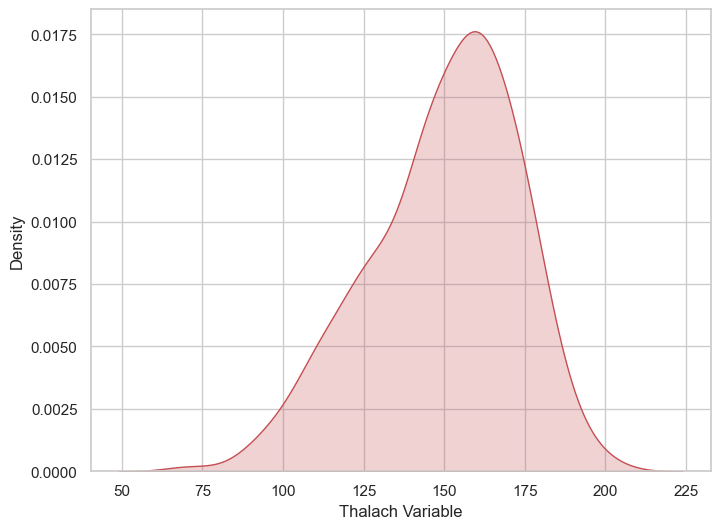

In [43]:
f, ax = plt.subplots(figsize = (8, 6))
x = df['thalach']
x = pd.Series(x, name="Thalach Variable")
ax = sns.kdeplot(x, shade = True, color  = 'r')
plt.show()

#### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

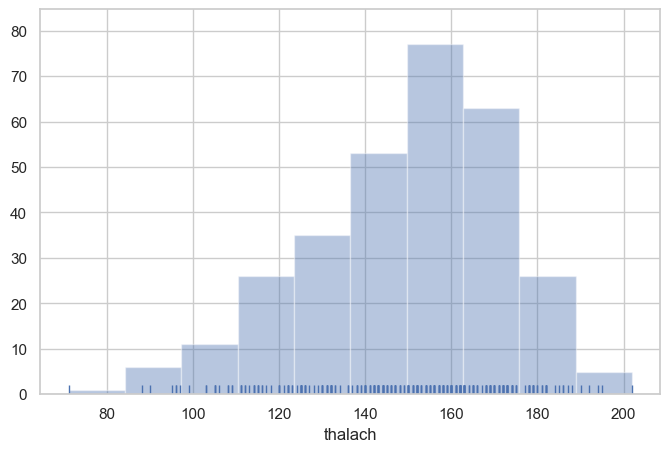

In [44]:
f, ax = plt.subplots(figsize = (8, 5))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins = 10)
plt.show()

#### Visualize frequency distribution of `thalach` variable wrt `target`

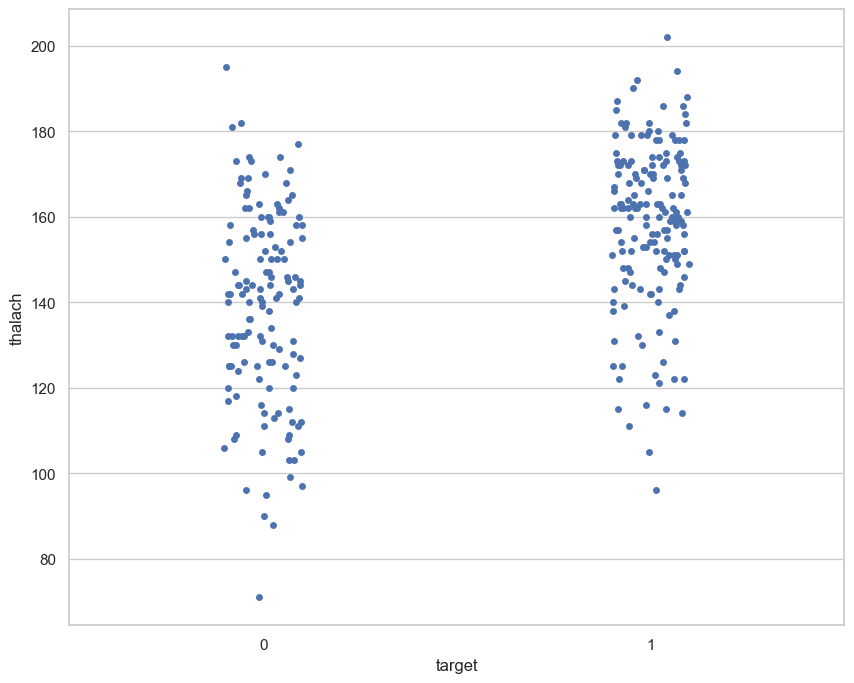

In [45]:
f, ax = plt.subplots(figsize = (10, 8))
sns.stripplot(x = 'target', y = 'thalach', data = df)
plt.show()

`jitter` Adds a small amount of random noise to the position of the points along the x-axis (within each 'target' category). This helps prevent the points from overlapping exactly, making it easier to see individual data points. The value 0.001 controls the amount of jitter, with a small value meaning only a tiny shift.

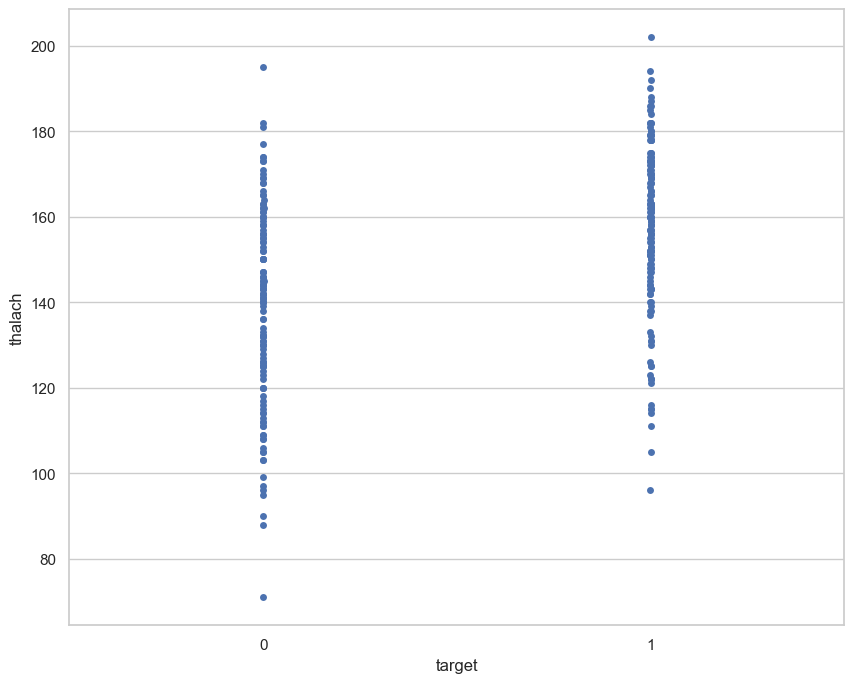

In [46]:
f, ax = plt.subplots(figsize = (10, 8))
sns.stripplot(x = 'target', y = 'thalach', data=df, jitter = 0.001)
plt.show()

#### Visualize distribution of `thalach` variable wrt `target` with boxplot

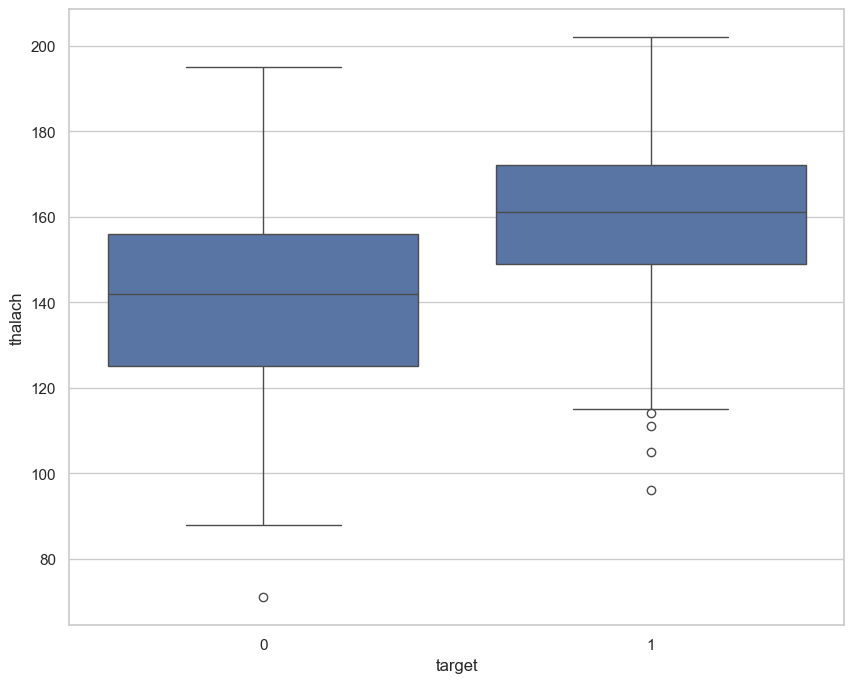

In [47]:
f, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'target', y = 'thalach', data = df)
plt.show()

#### Interpretation

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

### Findings of Bivariate Analysis <a class="anchor" id="8.4"></a>

Findings of Bivariate Analysis are as follows –


- There is no variable which has strong positive correlation with `target` variable.

- There is no variable which has strong negative correlation with `target` variable.

- There is no correlation between `target` and `fbs`.

- The `cp` and `thalach` variables are mildly positively correlated with `target` variable. 

- We can see that the `thalach` variable is slightly negatively skewed.

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


## 9. Multivariate analysis <a class="anchor" id="9"></a>


- The objective of the multivariate analysis is to discover patterns and relationships in the dataset.

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.

- First of all, I will draw a `heat map`.

## Heat Map

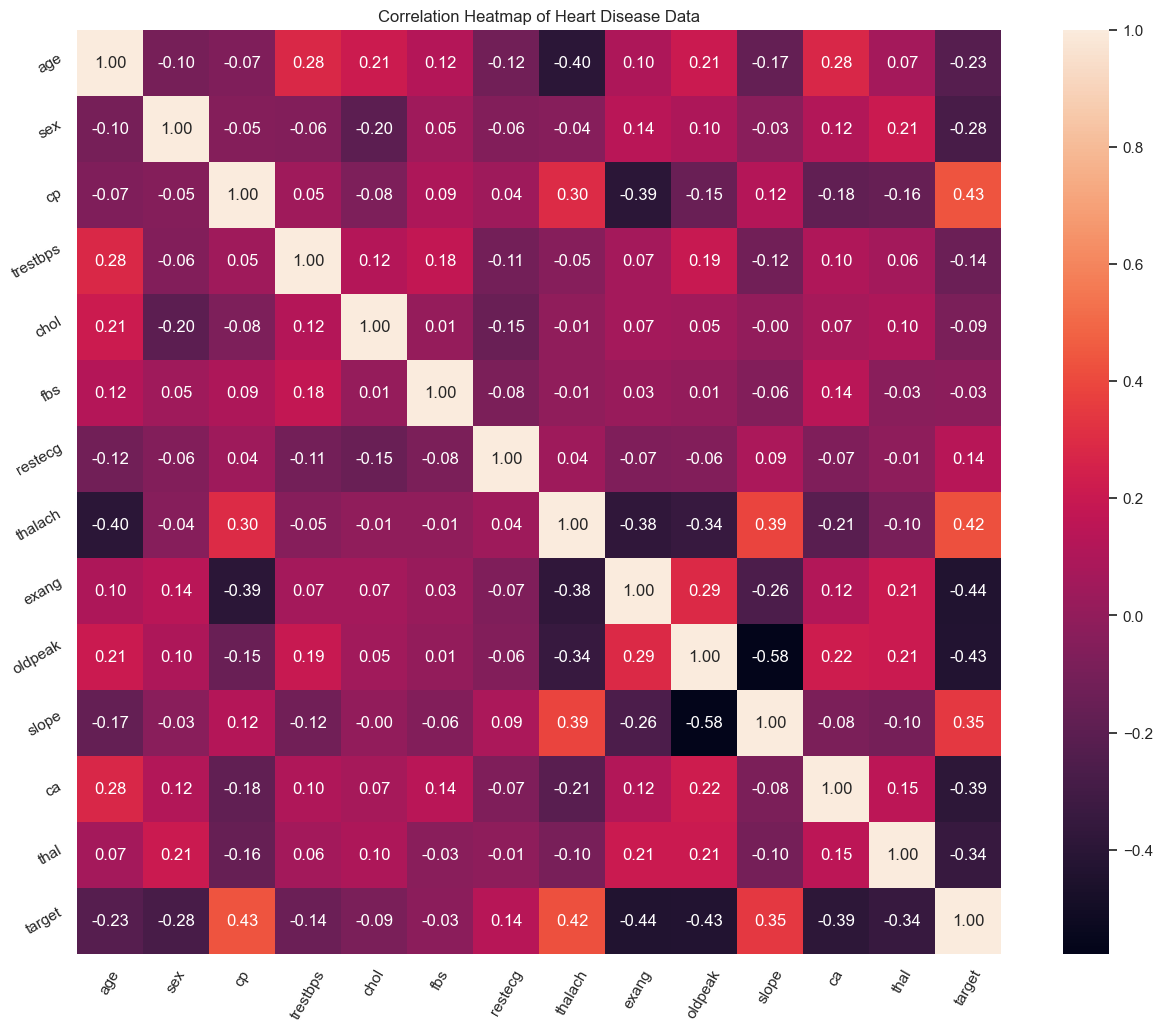

In [51]:
plt.figure(figsize=(16, 12))
plt.title("Correlation Heatmap of Heart Disease Data")
a = sns.heatmap(correlation, square=True, annot=True, fmt=".2f", linecolor = 'white')
a.set_xticklabels(a.get_xticklabels(), rotation = 60)
a.set_yticklabels(a.get_yticklabels(), rotation = 30)
plt.show()

#### Interpretation

From the above correlation heat map, we can conclude that :-

- `target` and `cp` variable are mildly positively correlated (correlation coefficient = 0.43).

- `target` and `thalach` variable are also mildly positively correlated (correlation coefficient = 0.42).

- `target` and `slope` variable are weakly positively correlated (correlation coefficient = 0.35).

- `target` and `exang` variable are mildly negatively correlated (correlation coefficient = -0.44).

- `target` and `oldpeak` variable are also mildly negatively correlated (correlation coefficient = -0.43).

- `target` and `ca` variable are weakly negatively correlated (correlation coefficient = -0.39).

- `target` and `thal` variable are also waekly negatively correlated (correlation coefficient = -0.34).


## Pair Plot

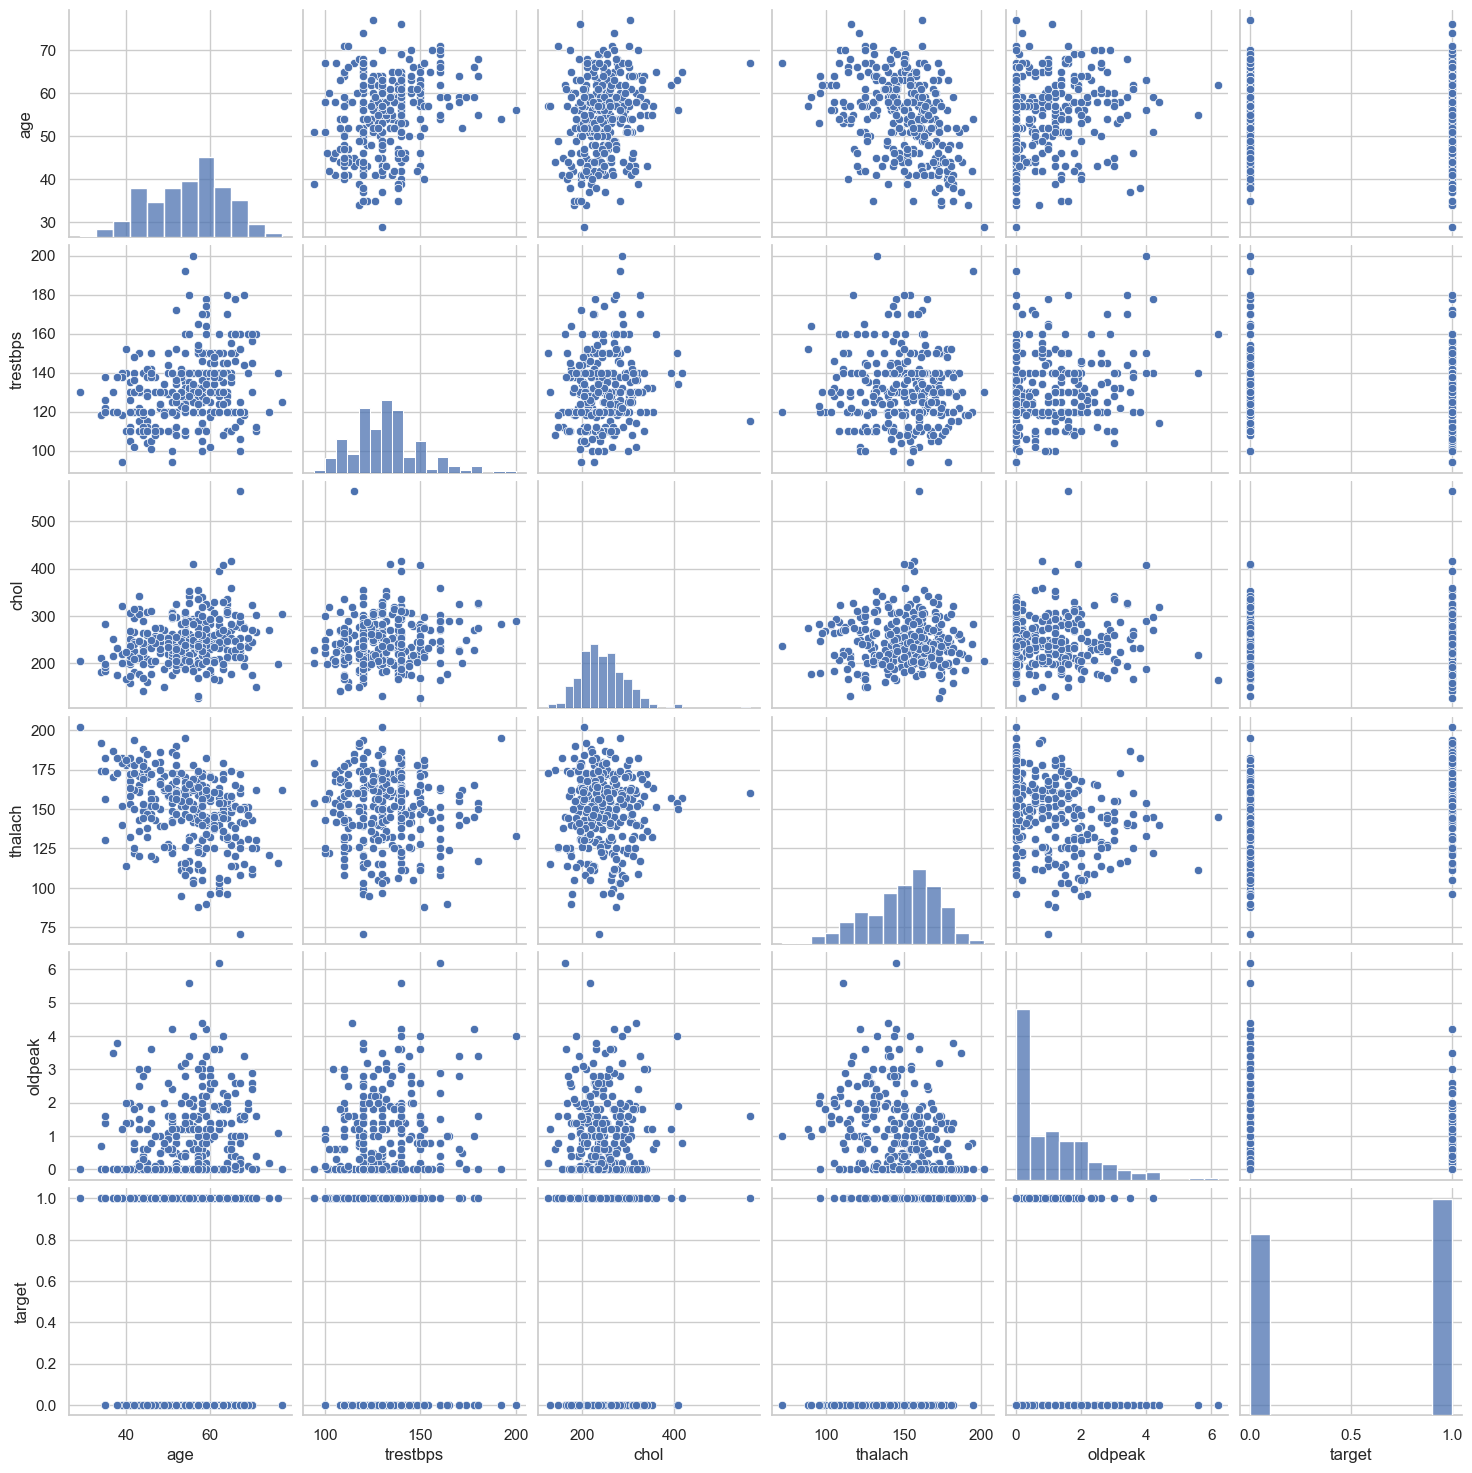

In [52]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[num_var], kind = 'scatter', diag_kind='hist')
plt.show()

#### Comment


- We have defined a variable `num_var`. Here `age`, `trestbps`, ``chol`, `thalach` and `oldpeak`` are numerical variables and `target` is the categorical variable.

- So, we will check relationships between these variables.

### Analysis of `age` and other variables

In [53]:
df['age'].nunique()

41

In [54]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Plot the distribution of `age` variable

Now, we will plot the distribution of `age` variable to view the statistical properties.

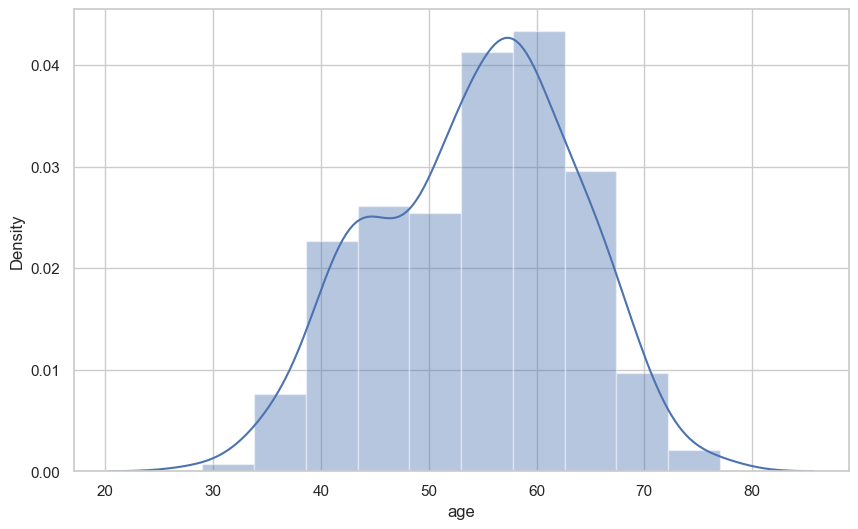

In [55]:
f, ax = plt.subplots(figsize = (10, 6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

#### Interpretation

- The `age` variable distribution is approximately normal.

### Analyze `age` and `target` variable

#### Visualize frequency distribution of `age` variable wrt `target`

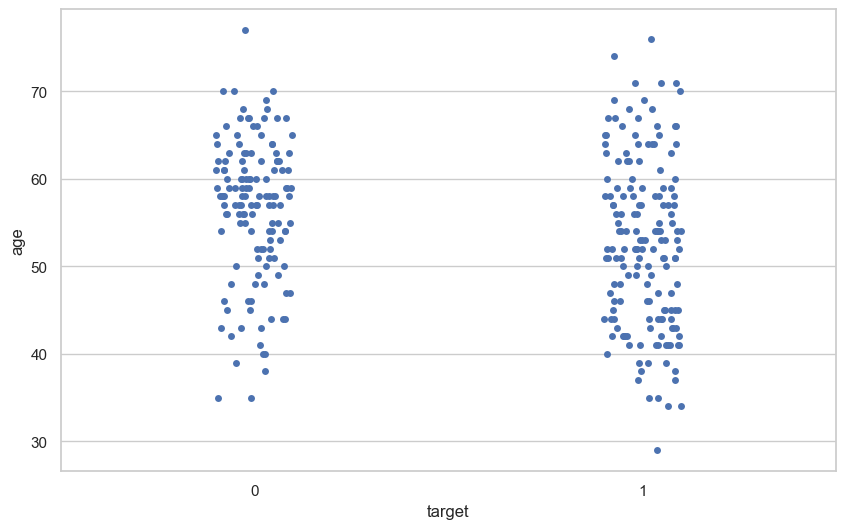

In [56]:
f, ax = plt.subplots(figsize = (10, 6))
sns.stripplot(x = 'target', y = 'age', data=df)
plt.show()

#### Interpretation

- We can see that the people suffering from heart disease (target = 1) and people who are not suffering from heart disease (target = 0) have comparable ages.

#### Visualize distribution of `age` variable wrt `target` with boxplot

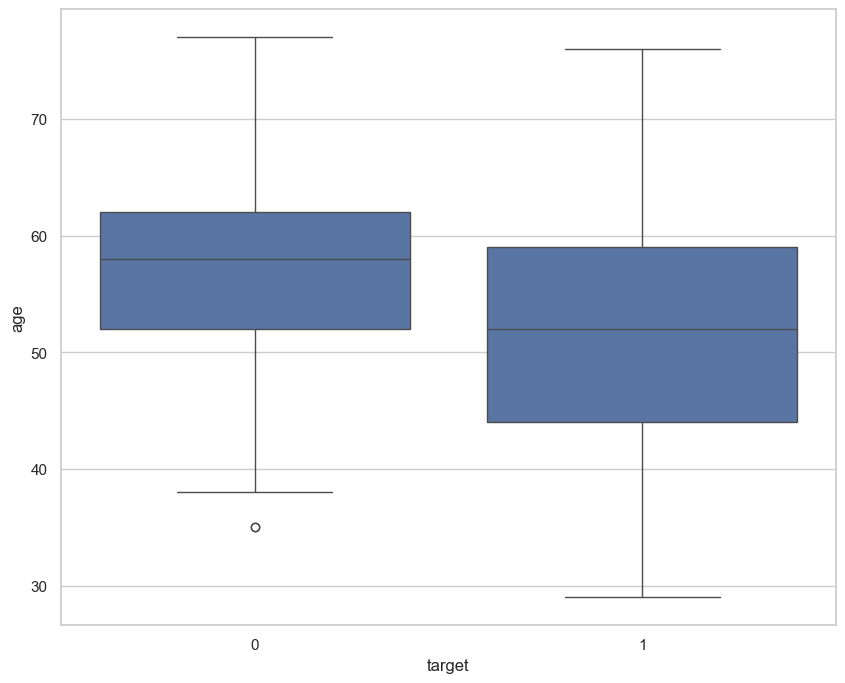

In [57]:
f, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'target', y = 'age', data=df)
plt.show()

#### Interpretation

- The above boxplot tells two different things :

  - The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.
  
  - The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.


### Analyze `age` and `trestbps` variable

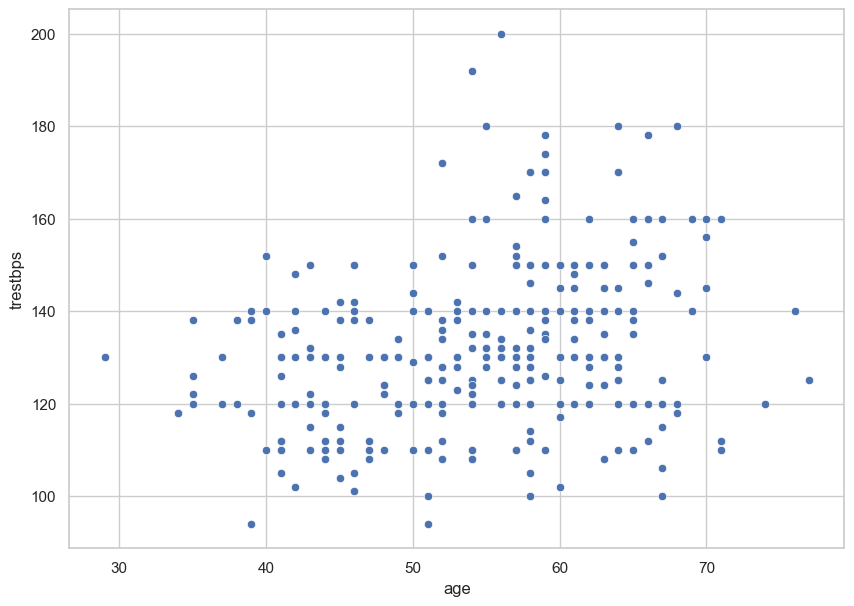

In [58]:
f, ax = plt.subplots(figsize = (10, 7))
ax = sns.scatterplot(x = 'age', y = 'trestbps', data = df)
plt.show()

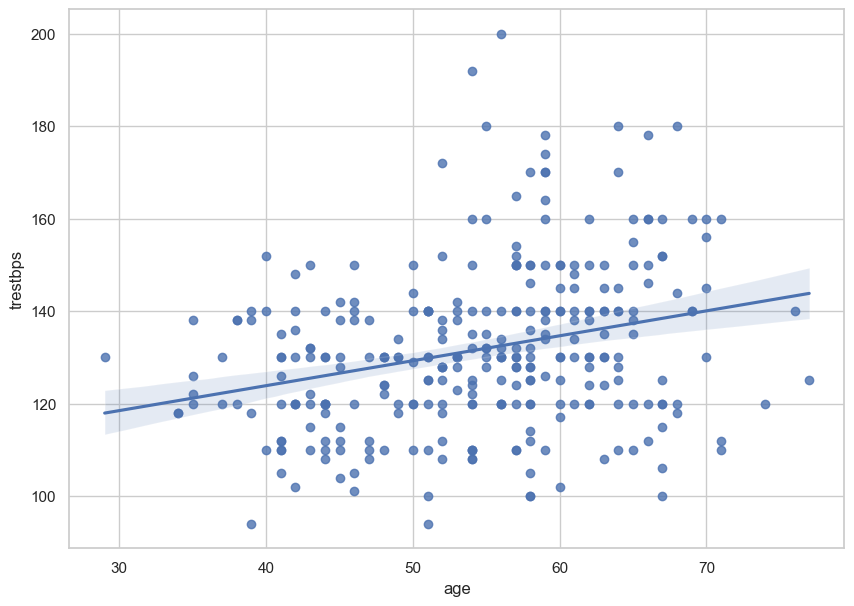

In [59]:
f, ax = plt.subplots(figsize = (10, 7))
ax = sns.regplot(x = 'age', y = 'trestbps', data = df)
plt.show()

#### Interpretation

- The above line shows that linear regression model is not good fit to the data.

### Analyze `age` and `chol` variable

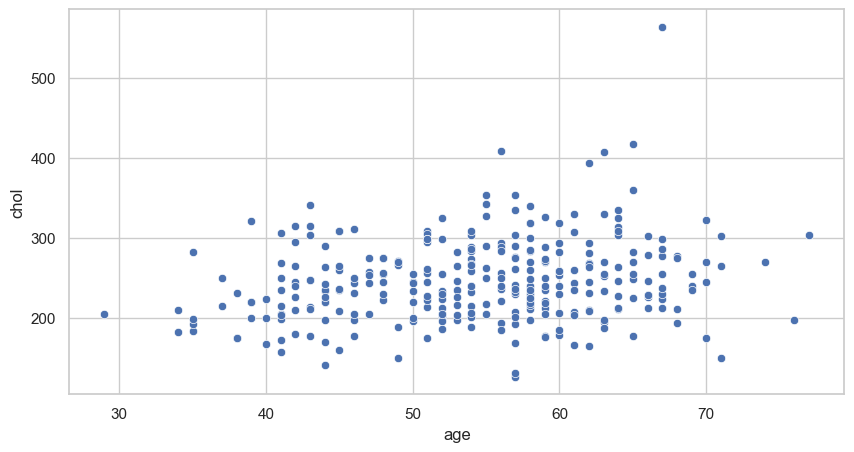

In [60]:
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.scatterplot(x = 'age', y = 'chol', data = df)
plt.show()

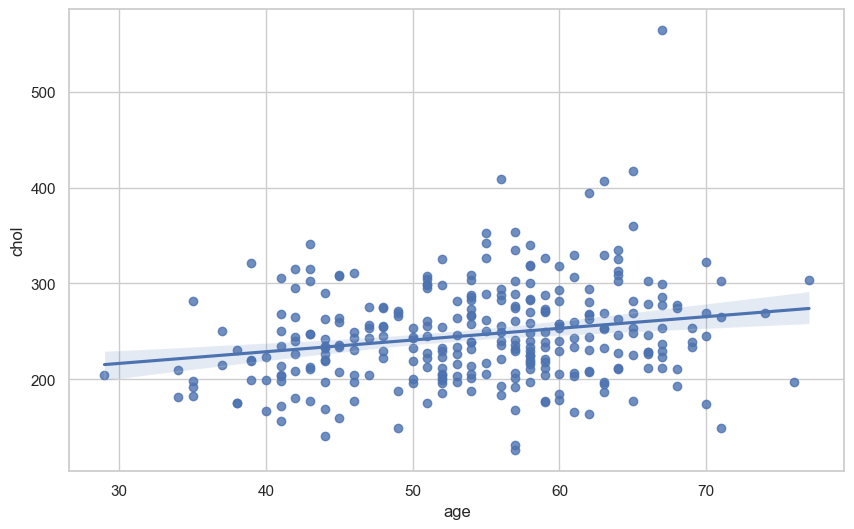

In [61]:
f, ax = plt.subplots(figsize = (10, 6))
ax = sns.regplot(x = 'age', y = 'chol', data = df)
plt.show()

#### Interpretation

- The above plot confirms that there is a slighly positive correlation between `age` and `chol` variables.

### Analyze `chol` and `thalach` variable

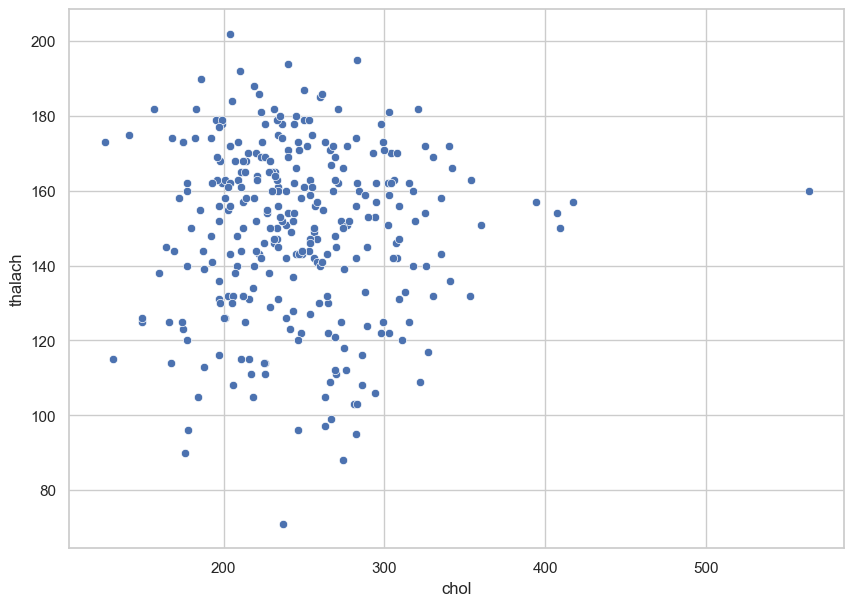

In [62]:
f, ax = plt.subplots(figsize = (10, 7))
ax = sns.scatterplot(x = 'chol', y = 'thalach', data =df)
plt.show()

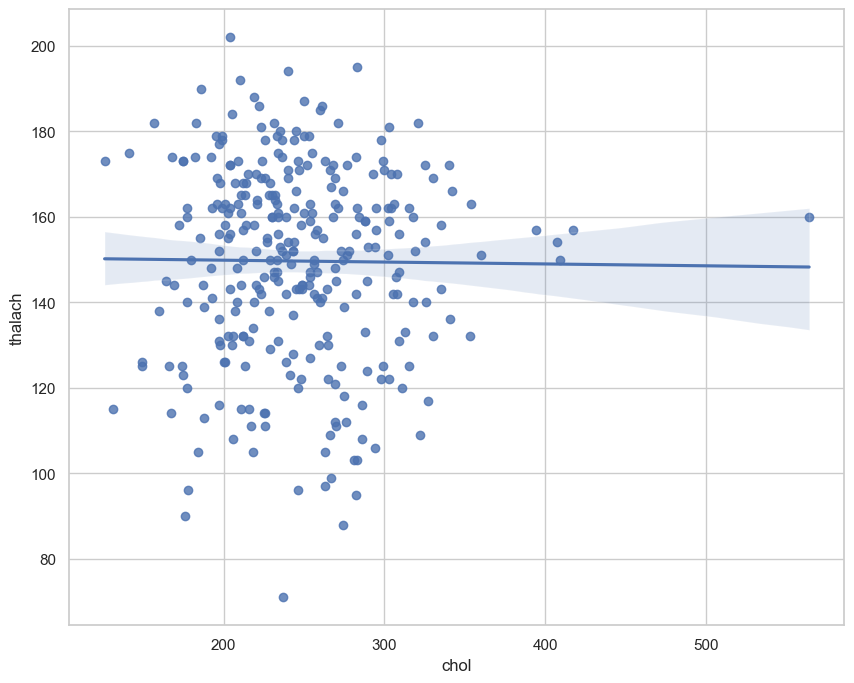

In [63]:
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.regplot(x = 'chol', y = 'thalach', data = df)
plt.show()

#### Interpretation


- The above plot shows that there is no correlation between `chol` and `thalach` variable.

## 10. Dealing with missing values

-	In Pandas missing data is represented by two values:

  -	**None**: None is a Python singleton object that is often used for missing data in Python code.
  
  -	**NaN** : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.


-  There are different methods in place on how to detect missing values.


### Pandas isnull() and notnull() functions <a class="anchor" id="10.1"></a>


- Pandas offers two functions to test for missing data - `isnull()` and `notnull()`. These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.

-  Below, I will list some useful commands to deal with missing values.


### Useful commands to detect missing values <a class="anchor" id="10.2"></a>

-	**df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.


-	**df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.


-	**df.isnull().sum().sum()** 

It returns total number of missing values in the dataframe.


-	**df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


-	**df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

-	**df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.


-	**df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.


-	**df.isnull().values.sum()**


It returns the total number of missing values in the dataframe.

In [64]:
# checking for null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We can see that there are no missing values in the dataset.

## 11. Check with ASSERT statement


- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [65]:
#assert that there are no missing values in the dataframe
assert pd.notnull(df).all().all()

In [66]:
# assert all that all values are greater than or equal to 0
assert (df >= 0).all().all()

#### Interpretation

- The above two commands do not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset. 

- All the values are greater than or equal to zero.

## 12. Outlier detection

Creating boxplots to visualise outliers in the continuous numerical variables : -

`age`, `trestbps`, `chol`, `thalach` and  `oldpeak` variables.


`age` variable

In [67]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

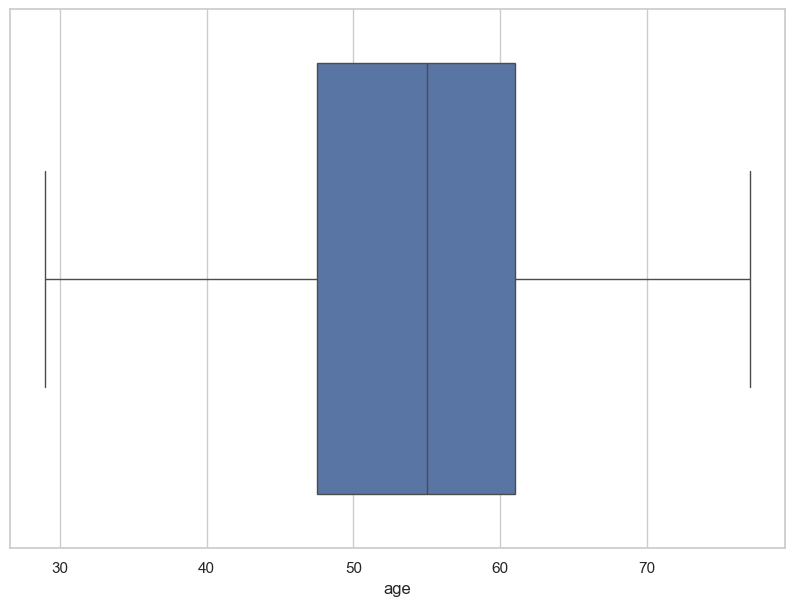

In [69]:
f, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(x = df['age'])
plt.show()

In [70]:
# tresbps variable

df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

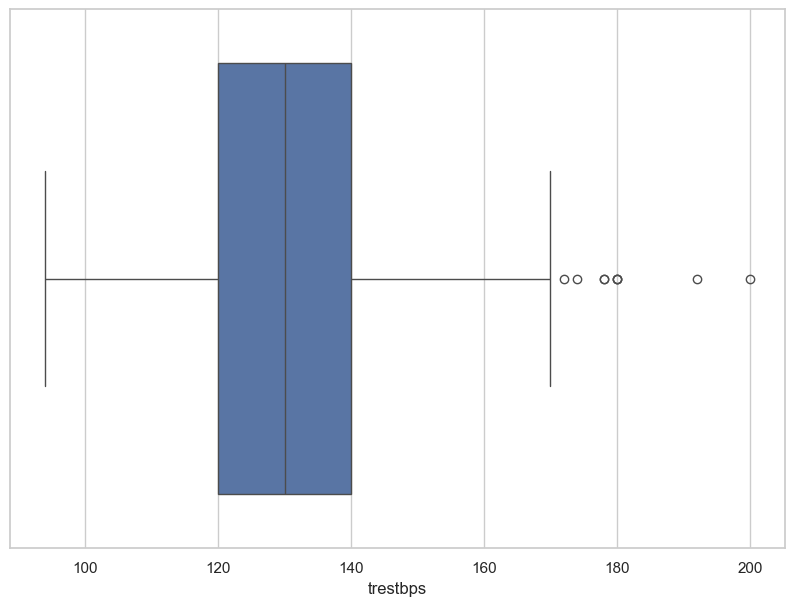

In [72]:
f, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(x = df['trestbps'])
plt.show()

In [73]:
# Chol variable

df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

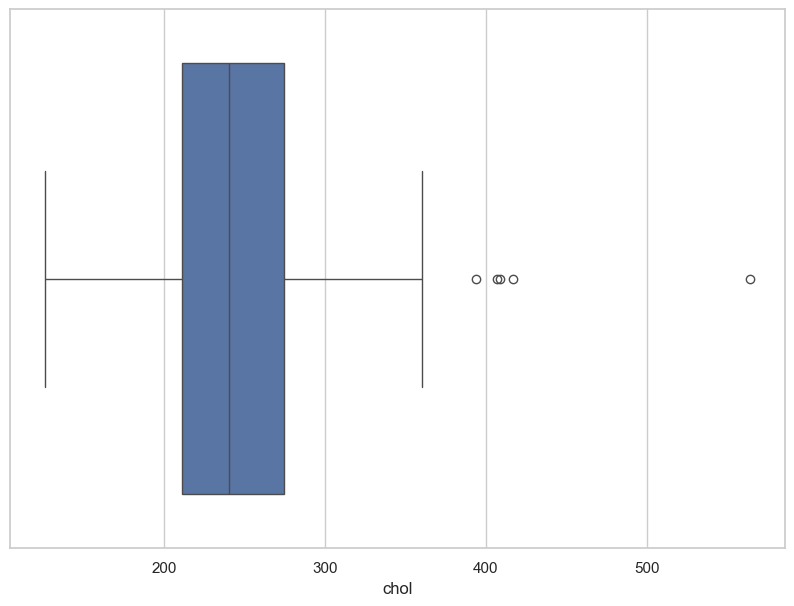

In [74]:
f, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(x = df['chol'])
plt.show()

In [75]:
# thalach variable

df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

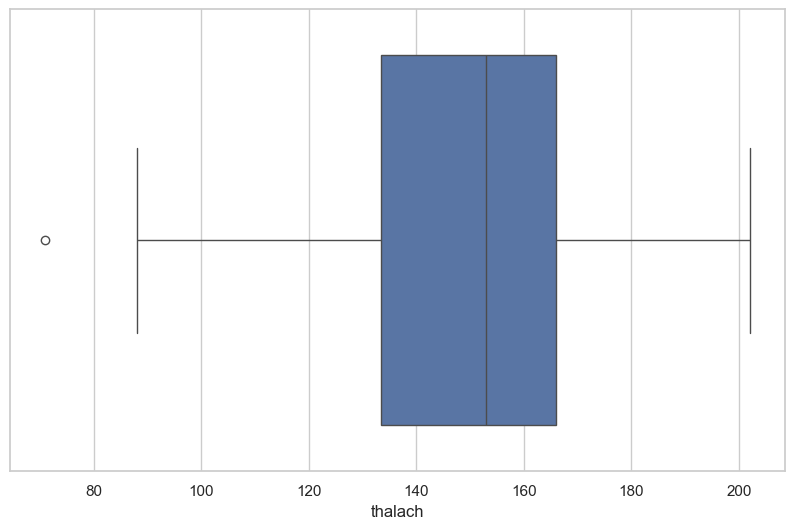

In [76]:
f, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = df['thalach'])
plt.show()

In [77]:
# oldpeak variable

df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

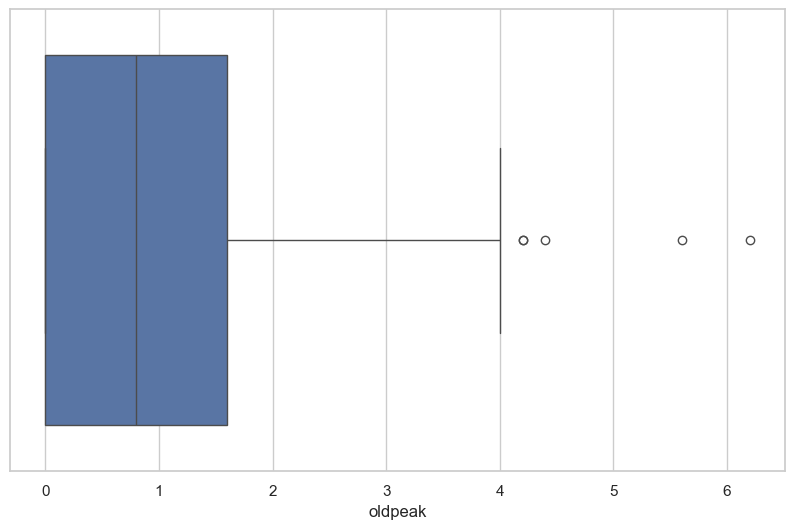

In [78]:
f, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = df['oldpeak'])
plt.show()

#### Findings

- The `age` variable does not contain any outlier.

- `trestbps` variable contains outliers to the right side.

- `chol` variable also contains outliers to the right side.

- `thalach` variable contains a single outlier to the left side.

- `oldpeak` variable contains outliers to the right side.

- Those variables containing outliers needs further investigation.
